In [84]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [54]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [55]:
weather.dtypes

Unnamed: 0              int64
Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                    int64
Depart                  int64
DewPoint                int64
WetBulb                 int64
Heat                    int64
Cool                    int64
Sunrise                object
Sunset                 object
CodeSum                object
PrecipTotal            object
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

In [56]:
weather['Week_Number'] = weather['Date'].dt.week

In [57]:
weather.head()

,Unnamed: 0,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,...,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Week_Number
0,0,1,2007-05-01,83,50,67,14,51,56,0,...,0448,1849,,0.00,29.10,29.82,1.7,27,9.2,18
1,1,2,2007-05-01,84,52,68,14,51,57,0,...,-,-,,0.00,29.18,29.82,2.7,25,9.6,18
2,2,1,2007-05-02,59,42,51,-3,42,47,14,...,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4,18
3,3,2,2007-05-02,60,43,52,-3,42,47,13,...,-,-,BR HZ,0.00,29.44,30.08,13.3,2,13.4,18
4,4,1,2007-05-03,66,46,56,2,40,48,9,...,0446,1851,,0.00,29.39,30.12,11.7,7,11.9,18


In [58]:
weather.Week_Number.nunique()

28

In [59]:
weather.Date.nunique()

1472

In [60]:
weather_types = ['FC','TS','GR','RA','DZ',
                 'SN','SG','GS','PL','IC',
                 'FG','BR','UP','HZ','FU',
                 'VA','DU','DS','PO','SA',
                 'SS','PY','SQ','DR','SH',
                 'FZ','MI','PR','BC','BL','VC']


def codesum_vars():
    for i in weather_types:
        weather[i] = weather['CodeSum'].str.contains(i,regex=True).astype(int)

In [61]:
codesum_vars()

In [63]:
weather.columns

Index([u'Unnamed: 0', u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg',
       u'Depart', u'DewPoint', u'WetBulb', u'Heat', u'Cool', u'Sunrise',
       u'Sunset', u'CodeSum', u'PrecipTotal', u'StnPressure', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed', u'Week_Number', u'FC', u'TS',
       u'GR', u'RA', u'DZ', u'SN', u'SG', u'GS', u'PL', u'IC', u'FG', u'BR',
       u'UP', u'HZ', u'FU', u'VA', u'DU', u'DS', u'PO', u'SA', u'SS', u'PY',
       u'SQ', u'DR', u'SH', u'FZ', u'MI', u'PR', u'BC', u'BL', u'VC'],
      dtype='object')

In [76]:
weather.RA.nunique()

2

In [78]:
weather.drop(['BL', 'PR', 'FZ', 'SH', 'DR', 'PY', 'SS', 
              'SA', 'PO', 'DS', 'DU', 'VA', 'UP', 'IC', 'PL', 'GS', 'SG', 'FC'],axis=1, inplace=True)

In [79]:
weather.columns

Index([u'Unnamed: 0', u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg',
       u'Depart', u'DewPoint', u'WetBulb', u'Heat', u'Cool', u'Sunrise',
       u'Sunset', u'CodeSum', u'PrecipTotal', u'StnPressure', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed', u'Week_Number', u'TS', u'GR',
       u'RA', u'DZ', u'SN', u'FG', u'BR', u'HZ', u'FU', u'SQ', u'MI', u'BC',
       u'VC'],
      dtype='object')

In [82]:
weather.to_csv('weather_dt_clean.csv')

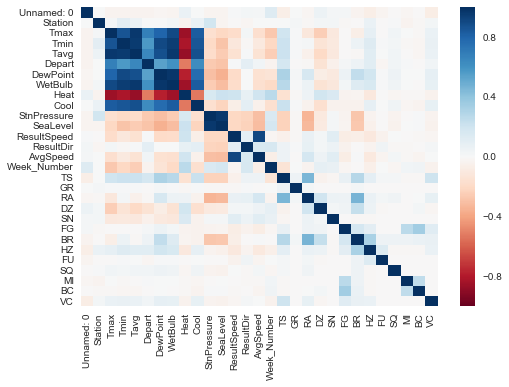

In [85]:
sns.heatmap(weather.corr(), cmap="RdBu")